# forecast

In [1]:
import bluebelt as blue

In [2]:
blue.set_style("fat")
blue.set_figsize_in_pixels(500, 350)
blue.set_language('nl')
blue.set_transparent(False)

In [3]:
frame = blue.create.frame(1, 2)
frame.columns = ['forecast', 'actuals']
frame.head(5)

,forecast,actuals
2022-01-03,533.5,456.50
2022-01-04,393.5,507.75
2022-01-05,371.5,401.00
2022-01-06,515.5,352.00
2022-01-07,516.5,461.50


Goede indicatoren voor het onderzoeken van de kwaliteit van de forecast zijn SMAPE en NFM. SMAPE onderzoekt de gemiddelde absolute afwijking en NFM kijkt naar de voorkeur voor een te krappe of te ruime forecast.

SMAPE staat voor symmetrical mean absolute percentage error

$$MAPE = \frac{100\%}{n} \sum^n_{t=1} \frac{|A_{t} - F_{t}|}{(|A_{t}| + |F_{t}|) \cdot 0.5}$$

De bovenstaande formule levert een getal op tussen 0 en 2 (ofwel 0% en 200%) dus wordt ook vaak de adjusted SMAPE gebruikt

$$SMAPE_{adjusted} = \frac{100\%}{n} \sum^n_{t=1} \frac{|A_{t} - F_{t}|}{|A_{t}| + |F_{t}|}$$

SMAPE(adjust=False, n=364, result=0.1245)


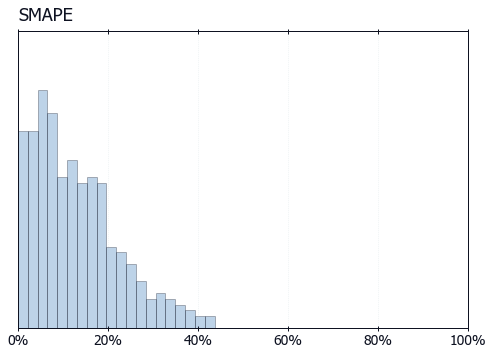

In [4]:
smape = frame._.forecast.smape(forecast='forecast', actuals='actuals', adjust=False)
print(smape)
smape.plot()

NFM staat for normalised forecast metric. Deze lijkt erg op de adjusted SMAPE maar geeft in plaats van de absolute fout de werkelijke fout. Hierdoor kan worden berekend of de forecast gemiddeld te krap of te ruim is.

$$NFM = \frac{100\%}{n} \sum^n_{t=1} \frac{F_{t} - A_{t}}{F_{t} + A_{t}}$$

NFM(n=364, result=0.0153, ci_mean=(0.0071, 0.0234), bias=True)


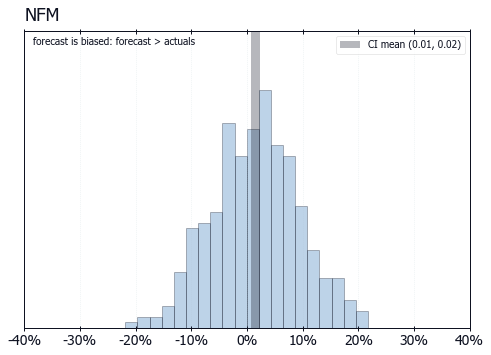

In [5]:
nfm = frame._.forecast.nfm(forecast='forecast', actuals='actuals', adjust=False)
print(nfm)
nfm.plot(xlim=(-.4,.4))

Overige tools die voor de forecast beschikbaar zijn

$$MAPE = \frac{100\%}{n} \sum^n_{t=1} \frac{|A_{t} - F_{t}|}{a_{t}}$$

MAPE(n=364, result=0.1299)


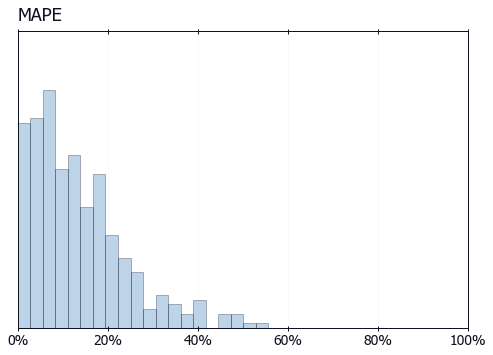

In [6]:
mape = frame._.forecast.mape(forecast='forecast', actuals='actuals')
print(mape)
mape.plot()

$$MPE = \frac{100\%}{n} \sum^n_{t=1} \frac{F_{t} - A_{t}}{A_{t}}$$

MPE(n=364, result=0.0442, ci_mean=(0.0271, 0.0614), bias=True)


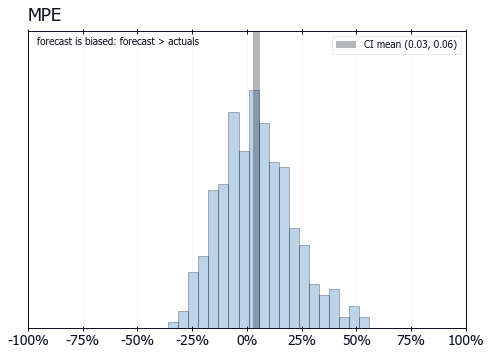

In [7]:
mpe = frame._.forecast.mpe(forecast='forecast', actuals='actuals', adjust=False)
print(mpe)
mpe.plot()

In [8]:
mda = frame._.forecast.mda(forecast='forecast', actuals='actuals', adjust=False)
print(mda)

MDA(n=364, result=0.7190)


MAE Mean Absolute Error

$$MAE = \frac{{\sum^n_{t=1}|A_{t} - F_{t}|}}{n}$$

MAE(n=364, result=50.8914)


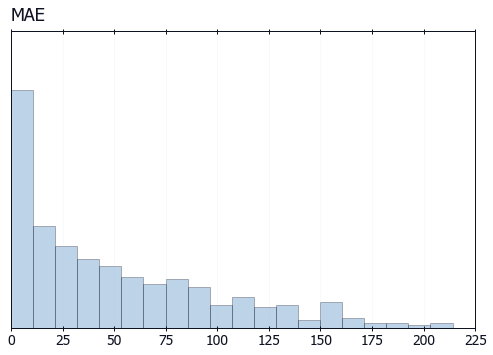

In [9]:
mae = frame._.forecast.mae(forecast='forecast', actuals='actuals', adjust=False)
print(mae)
mae.plot()

Mean Directional Accuracy; klopt de richting van de forecast

$$MDA = \frac{{\sum_{t}1_{sgn(A_{t}-A_{t-1})=sgn(F_{t}-F_{t-1})}}}{n}$$

In [10]:
mda = frame._.forecast.mda(forecast='forecast', actuals='actuals', adjust=False)
print(mda)

MDA(n=364, result=0.7190)
